In [3]:
%mkdir /Users/macpro/PycharmProjects/yoloProject/pothole
%cd /Users/macpro/PycharmProjects/yoloProject/pothole
!curl -L "https://public.roboflow.com/ds/FmKXVzXrT5?key=I9HXVWFLAe" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

mkdir: /Users/macpro/PycharmProjects/yoloProject/pothole: File exists
/Users/macpro/PycharmProjects/yoloProject/pothole
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1880      0 --:--:-- --:--:-- --:--:--  1884
100 46.0M  100 46.0M    0     0  7455k      0  0:00:06  0:00:06 --:--:--  9.9M25  330k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91

In [4]:
from glob import glob

train_img_list = glob('/Users/macpro/PycharmProjects/yoloProject/pothole/train/images/*.jpg')
test_img_list = glob('/Users/macpro/PycharmProjects/yoloProject/pothole/test/images/*.jpg')
valid_img_list = glob('/Users/macpro/PycharmProjects/yoloProject/pothole/valid/images/*.jpg')

print(len(train_img_list), len(test_img_list), len(valid_img_list))

465 67 133


In [5]:
import yaml

with open('/Users/macpro/PycharmProjects/yoloProject/pothole/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')
   
with open('/Users/macpro/PycharmProjects/yoloProject/pothole/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

with open('/Users/macpro/PycharmProjects/yoloProject/pothole/valid.txt', 'w') as f:
    f.write('\n'.join(valid_img_list) + '\n')        

In [7]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [36]:
%cat /Users/macpro/PycharmProjects/yoloProject/pothole/data.yaml


train: /Users/macpro/PycharmProjects/yoloProject/pothole/train/images
test: /Users/macpro/PycharmProjects/yoloProject/pothole/test/images
val: /Users/macpro/PycharmProjects/yoloProject/pothole/valid/images

nc: 1
names: ['pothole']


In [35]:
%%writetemplate /Users/macpro/PycharmProjects/yoloProject/pothole/data.yaml

train: /Users/macpro/PycharmProjects/yoloProject/pothole/train/images
test: /Users/macpro/PycharmProjects/yoloProject/pothole/test/images
val: /Users/macpro/PycharmProjects/yoloProject/pothole/valid/images

nc: 1
names: ['pothole']

In [46]:
import yaml

with open("/Users/macpro/PycharmProjects/yoloProject/pothole/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

%cat /Users/macpro/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [49]:
%%writetemplate /Users/macpro/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [50]:
%cat /Users/macpro/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 1 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-

In [51]:
#학습
# img: 입력 이미지 크기 정의
# batch: 배치 크기 결정
# epochs: 학습 기간 개수 정의
# data: yaml 파일 경로
# cfg: 모델 구성 지정
# weights: 가중치에 대한 경로 지정
# name: 결과 이름
# nosave: 최종 체크포인트만 저장
# cache: 빠른 학습을 위한 이미지 캐시
%time
%cd /Users/macpro/yolov5/

!python train.py --img 640 --batch 32 --epochs 10 --data /Users/macpro/PycharmProjects/yoloProject/pothole/data.yaml --cfg /Users/macpro/yolov5/models/custom_yolov5s.yaml --weights '' --name pothole_results --cache

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.87 µs
/Users/macpro/yolov5
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
train: weights=, cfg=/Users/macpro/yolov5/models/custom_yolov5s.yaml, data=/Users/macpro/PycharmProjects/yoloProject/pothole/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

In [167]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.
Contents of stdout:
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions

In [169]:
!python val.py --weights runs/train/pothole_results7/weights/best.pt --data /Users/macpro/PycharmProjects/yoloProject/pothole/data.yaml --img 640 --iou 0.65 --task val

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
val: data=/Users/macpro/PycharmProjects/yoloProject/pothole/data.yaml, weights=['runs/train/pothole_results7/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.8.18 torch-2.2.1 CPU

Fusing layers... 
[W NNPACK

In [134]:
%ls runs/train/pothole_results7/weights/best.pt

runs/train/pothole_results7/weights/best.pt


In [136]:
!python detect.py --weights runs/train/pothole_results7/weights/best.pt --img 640 --conf 0.4 --source /Users/macpro/PycharmProjects/yoloProject/pothole/test/images

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
detect: weights=['runs/train/pothole_results7/weights/last.pt'], source=/Users/macpro/PycharmProjects/yoloProject/pothole/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_con

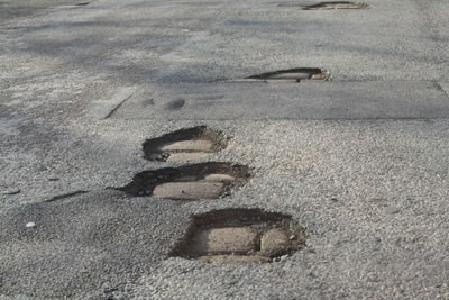

In [173]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/Users/macpro/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))